# Data analysis, manipulation and plotting

### Topics

1. Introduction to arrays and vectors in numpy.  

2. Loading/Saving data. 

3. Essential methods for data analysis/manipulation. 

4. Elementary plotting using matplotlib.

In [1]:
#Import necessary libraries 
import numpy as np
import matplotlib.pyplot as plt


### Useful Numpy operations

* [`np.ones(size)`](https://numpy.org/doc/stable/reference/generated/numpy.ones.html#numpy.ones), [`np.zeros(size)`](https://numpy.org/doc/stable/reference/generated/numpy.zeros.html): Creates an array of size `size` with either all ones or zeros.

* [`np.linspace(start, stop, num)`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html#numpy.linspace), [`np.arange(start, stop, step)`](https://numpy.org/doc/stable/reference/generated/numpy.arange.html#numpy-arange): Creates 1d arrays of ranges from `start` to `stop` (inclusive) using either interpolation to create `num` elements in the case of `linspace` or using a certain `step`-size in `arange`.

* [`np.random.uniform(size)`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html#numpy.random.uniform), [`np.random.normal(loc, scale, size)`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html#numpy.random.normal): Creates arrays with random elements drawn either from a uniform or normal/Gaussian distribution. For the gaussian, `loc`=$\mu$ (mean) and `scale`=$\sigma$ (standard deviation).

In [2]:
a_ones = np.ones((2, 3))            # 2 by 3 array of ones. 
a_zeros = np.zeros((3, 2))          # 2 by 3 array of zeroes.
a_linspace = np.linspace(0, 10, 5)  # array of 5 nums evenly spaced from 0 to 9 (10-1 # zero indexed).
a_arange = np.arange(0, 10, 2)      # array from 0 to 9 (max) with a stride of 2. since (10>9) the max value will be 8.
a_uniform = np.random.uniform(size= (2, 2)) # 2 by 2 array of "random" numbers drawn from a uniform distribution. 
a_normal = np.random.normal(size=(2, 2))    # 2 by 2 array of "random" numbers drawn from a normal/gaussian distribution. 

print('ones:\n', a_ones)
print('zeros:\n', a_zeros)
print('linspace:\n', a_linspace)
print('arange:\n', a_arange)
print('uniform:\n', a_uniform)
print('normal:\n', a_normal)


ones:
 [[1. 1. 1.]
 [1. 1. 1.]]
zeros:
 [[0. 0.]
 [0. 0.]
 [0. 0.]]
linspace:
 [ 0.   2.5  5.   7.5 10. ]
arange:
 [0 2 4 6 8]
uniform:
 [[0.89917154 0.79781347]
 [0.44974083 0.08128594]]
normal:
 [[-1.20301178  0.34070138]
 [ 0.29371387 -0.61829617]]


## Saving arrays with numpy

The following example shows how to save Numpy arrays. Numpy arrays can be stored in two formats:
* [`np.save(save_path)`](https://numpy.org/doc/stable/reference/generated/numpy.save.html#numpy.save) stores the data as a compressed npy file.
* [`np.savetxt(save_path)`](https://numpy.org/doc/stable/reference/generated/numpy.savetxt.html) stores the data as a (uncompressed txt-file).


In [23]:
a_normal_50 = np.random.normal(size=(50,2))
## Saving the array as a compressed npy file (numpy data format)
np.save('./Data/RandomData.npy',a_normal_50) 

a_arange_50 = np.arange(0,100,2)
np.save('./Data/StructuredData.npy',a_arange_50)

#numpy can additionally save to as a txt-file (uncompressed) formats like.
a_linspace_50 = np.linspace((1,2),(10,20),10)
### saving data as a regular txt file, also possible to save as a csv file
np.savetxt('./Data/Txt_file.txt',a_linspace_50) 


## Loading data with numpy

Numpy arrays can be loaded with the Numpy functions `np.load(path)` and `np.loadtxt(path)` aws shown in the following example:


In [24]:
## Loading data stored as a compressed npy file (numpy data format)
A = np.load('./Data/RandomData.npy') 
B = np.load('./Data/StructuredData.npy')

#load data stored as a txt/ (csv) file (uncompressed) formats like.
C = np.loadtxt('./Data/Txt_file.txt')

# Note A[:N] is only a slice i.e. the first N elements of A
print('A:\n',A[:5])
print('B:\n',B[:10])
print('C:\n',C[:5])

A:
 [[-0.26213006 -0.5933807 ]
 [ 1.08625266 -1.29803499]
 [-0.84009091 -0.76566598]
 [ 0.94150557  0.75964165]
 [ 0.59257595  0.98924685]]
B:
 [ 0  2  4  6  8 10 12 14 16 18]
C:
 [[ 1.  2.]
 [ 2.  4.]
 [ 3.  6.]
 [ 4.  8.]
 [ 5. 10.]]


## Operate along dimensions

Numpy arrays are also used for handling multidimensional data, sometimes requiring operations along specific axes.


### Example: Mean
In this example, we calculate the average of $N$ random vectors. 

The cell below defines an $N\times K$ matrix of random values:


In [4]:
N, K = 20, 10
r = np.random.uniform(size=(N, K))

The Numpy function `np.mean` calculates averages over Numpy arrays. The `axis` argument specifies the direction ($0$ for rows or $1$ for columns) of the calculation. This is demonstrated in the cell below:

In [6]:
np.mean(r, axis=0)


array([0.46210755, 0.57073283, 0.38088345, 0.50988551, 0.51259901,
       0.58658483, 0.50283856, 0.56807273, 0.69696661, 0.4641718 ])

## Essential Numpy array methods for data analysis and manipulation

This section covers essential methods for data analysis and manipulation. The methods will be used abundantly throughout the course and are worth paying careful attention to.

* [`np.mean(Array,dim)`](https://numpy.org/doc/stable/reference/generated/numpy.mean.html), [`np.std(Array,dim)`](https://numpy.org/doc/stable/reference/generated/numpy.std.html): Calculate the mean value of a given Numpy array of numbers (`floats` or `integers`).
* `a.shape`: Finds the shape (dimensionality of a given data array), `Len(list/Array)` provides the length of the first list/Array dimension.
* **Slicing:** using the `:` operator can create slices (subvectors) of an array `A` as `A[start:stop:step]`. Read more in the official guide [here](https://numpy.org/doc/stable/user/basics.indexing.html).
* **Broadcasting:** Is used in Numpy to perform operations between arrays of different size. Read more in the official guide [here](https://numpy.org/doc/stable/user/basics.broadcasting.html).
* **Elementwise addition and multiplication**
* [`np.concatenate(Array list, axis)`](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html): Stack numpy arrays along the direction of `axis`.


Next, we consider a few examples to demonstrate the functionalities described above:


In [27]:
A = np.linspace(0,9,10)

B = np.array([
    [-16, 15, -14, 13],
    [-12, 11, -10, 9],
    [-8, 7, -6, 5],
    [-4, 3, -2, 1]
])

print('A:\n',A)
print('B:\n',B)


A:
 [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
B:
 [[-16  15 -14  13]
 [-12  11 -10   9]
 [ -8   7  -6   5]
 [ -4   3  -2   1]]


In [28]:
### Mean of an array 
# Using/calling the mean method from the Numpy library to determine the mean of the loaded data.
print('Mean A:\n',np.mean(A)) 

# Most Numpy array manipulation methods can additionally be called from an array object
print('Mean of using Array method:\n',A.mean())

### Std of an array 
print('Std of A:\n',np.std(A))

### Sum of an array 
print('A sum:\n', np.sum(A))

### shape (size) of an array
print('A shape:\n',A.shape)
print('B shape:\n',B.shape)

## np.concatenation([A,B]) example
print('Concatenation of A and Slice of B matrix:\n',np.concatenate([A,B[0,:]],axis=0))


Mean A:
 4.5
Mean of using Array method:
 4.5
Std of A:
 2.8722813232690143
A sum:
 45.0
A shape:
 (10,)
B shape:
 (4, 4)
Concatenation of A and Slice of B matrix:
 [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9. -16.  15. -14.  13.]


## Slicing of arrays


In [29]:
### Slicing of array
print(B[:,0])

print(A[:5])
print('A[5:], A array except the first 5:\n',A[5:])

print('A[:-5], A array except the last 5:\n', A[:-5])

print('A[1::2] array of every second elemt of A starting from the second:\n',A[1::2])


[-16 -12  -8  -4]
[0. 1. 2. 3. 4.]
A[5:], A array except the first 5:
 [5. 6. 7. 8. 9.]
A[:-5], A array except the last 5:
 [0. 1. 2. 3. 4.]
A[1::2] array of every second elemt of A starting from the second:
 [1. 3. 5. 7. 9.]


## Array Arithmetic


In [30]:
### Adding of array
print('Adding a slice of A shape (4,) to B shape (4,4) using broadcasting:\n',A[:4]+B)

print('Adding constant to A (10,) using broadcasting:\n',A+10)
print('Adding single element array (shape (1,)) to B (shape (4,4)) using broadcasting:\n',B  + np.array([10]))

### Elementwise multiplication of arrayLoading
print('Elementwise multiplication of a slice of A (shape (4,)) to B (shape (4,4)) using broadcasting:\n',A[:4]*B)

### Add division example
print('Elementwise division of a slice of B (shape (4,)) and A (shape (4,)):\n',B[0,:]/A[1:5])


Adding a slice of A shape (4,) to B shape (4,4) using broadcasting:
 [[-16.  16. -12.  16.]
 [-12.  12.  -8.  12.]
 [ -8.   8.  -4.   8.]
 [ -4.   4.   0.   4.]]
Adding constant to A (10,) using broadcasting:
 [10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
Adding single element array (shape (1,)) to B (shape (4,4)) using broadcasting:
 [[-6 25 -4 23]
 [-2 21  0 19]
 [ 2 17  4 15]
 [ 6 13  8 11]]
Elementwise multiplication of a slice of A (shape (4,)) to B (shape (4,4)) using broadcasting:
 [[ -0.  15. -28.  39.]
 [ -0.  11. -20.  27.]
 [ -0.   7. -12.  15.]
 [ -0.   3.  -4.   3.]]
Elementwise division of a slice of B (shape (4,)) and A (shape (4,)):
 [-16.           7.5         -4.66666667   3.25      ]


## Comparison operators
Just as the elementwise arithmetic operators, Numpy implements elementwise comparison operators (see the [official guide](https://numpy.org/doc/stable/user/basics.indexing.html#boolean-array-indexing) for additional detail). For example, to find all elements of `vr` larger than $98$, write: 


In [31]:
vr = np.array([0, 99, 5, 70, 24, 1, 200]) # Create array of random values
vr > 98


array([False,  True, False, False, False, False,  True])

This boolean array can be used to select elements from a Numpy array:

In [32]:
comparison = vr > 98
vr[comparison]


array([ 99, 200])

Boolean arrays can be combined by using the logical operators `&` and `|`:


In [33]:
vr[(vr < 2) | (vr > 98)]


array([  0,  99,   1, 200])

Boolean indexing can also be used for assignment:


In [34]:
vr[vr > 50] = 0
vr


array([ 0,  0,  5,  0, 24,  1,  0])

## Basics plotting with matplotlib
Matplotlib contains an API for creating and manipulating plots using functions.

`plot` and `scatter` will be the most frequently used functions in this course:
* [`plot`](https://matplotlib.org/stable/plot_types/basic/plot.html#sphx-glr-plot-types-basic-plot-py) is typically used for creating connected line segments described by x and y data.
* [`scatter`](https://matplotlib.org/stable/plot_types/basic/scatter_plot.html#sphx-glr-plot-types-basic-scatter-plot-py) is used for plotting individual points, e.g. from a dataset.

### Line plot

Take a look at the following sample plot code and output:


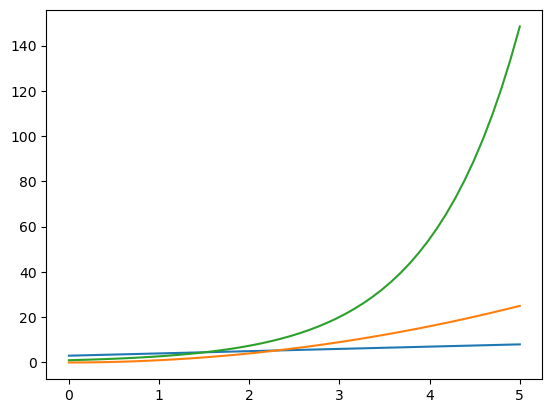

In [35]:
x_range = np.linspace(0, 5, 50) # Creates an array of linearly spaced elements
y_linear = x_range + 3 # adding to constant to the numpy array (broadcasting)
y_quadratic = x_range**2 # elementwise exponetiation
y_exp = np.exp(x_range) # exponential function applied elemtwise to x_range

plt.plot(x_range, y_linear)
plt.plot(x_range, y_quadratic)
plt.plot(x_range,y_exp);


### Scatter plot

Scatter plots are two-dimensional plots of individual points. The example below creates a quadratic function, adds normally distributed random noise to it, and plots both the original (with [`plt.plot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html)) and the noisy points (with [`plt.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.scatter.html#)).


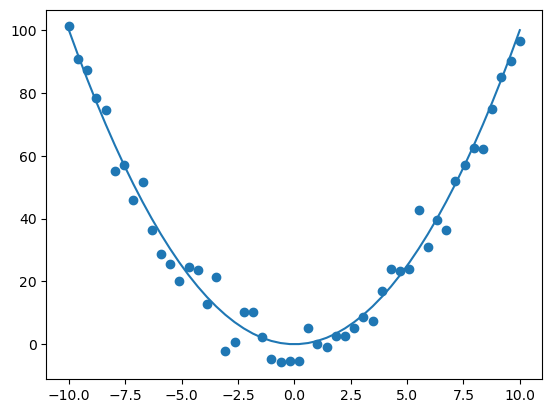

In [36]:
x_range = np.linspace(-10, 10, 50) # Create the x-values for the plot
y_values = x_range**2 # Calculate the y-values for the quadratic

noise = np.random.normal(scale=5, size=50) # Create random noise
y_noise = y_values + noise # Add the noise to the y-values

plt.plot(x_range, y_values) # Plot the quadratic function
plt.scatter(x_range, y_noise); # Plot the noisy points


## Styling
Matplotlib allows customization of plots. Some useful functionality is described below:

* [`plt.plot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html) takes a third argument, `format`, which is used to adapt the styling of lines. Generally, a letter designating a color (e.g. `r`,`g`,`b`) and a symbol designating line or point style (e.g. `+`, `--`) are combined to produce a format, e.g. `r+` to create red crosses.
* [`plt.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.scatter.html#) takes an argument `c` for the color (can be letter form or complete color names) and an argument `marker` for the marker style (e.g. `+`, `o`).

Here is a basic example:


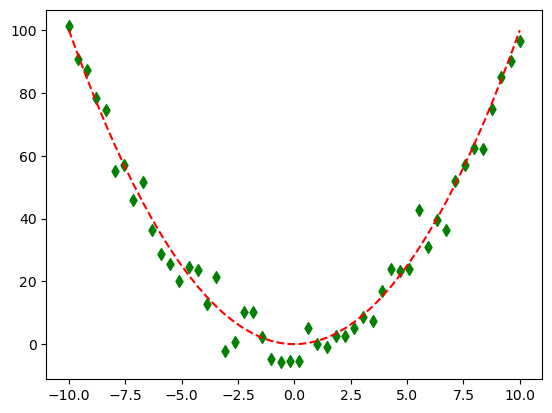

In [37]:
plt.plot(x_range, y_values, 'r--')
plt.scatter(x_range, y_noise, c='green', marker='d');


### Advanced styling


Matplotlib automatically assigns colors to lines and point series using an internally defined `style`, however, you can change colors manually. The current style can be changed permanently using [`plt.style.use(style)`](https://matplotlib.org/stable/api/style_api.html#matplotlib.style.use) or inside a `with` block using `plt.style.context(style)`. A reference of built-in style-sheets can be found [here](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html). The cell below shows an example:


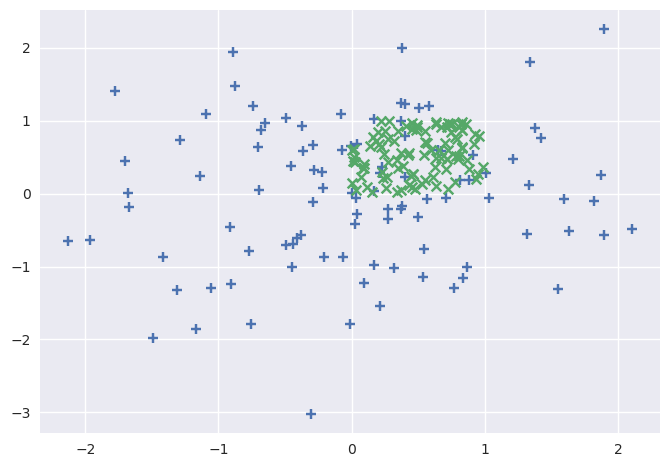

In [38]:
# We create some normal and uniformly distributed noise. (random data i.e. not structured)
xs, ys = np.random.normal(size=(2, 100))
xu, yu = np.random.uniform(size=(2,100))

with plt.style.context('dark_background'):
    plt.scatter(xs, ys, marker='+')
    plt.scatter(xu, yu, marker='x')


## Labels, Title and Legend
Legend, title, and axis labels can be added to plots using the following functions: 
 
* [`plt.legend(titles)`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html): Creates a legend using a list of `titles` for the names. Previously plotted elements are added in order.
* [`plt.title(title)`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html): Set plot title using string `title`. Use [`plt.suptitle`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.suptitle.html) when adding a title to multiple plots.
* [`plt.ylabel(name)`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylabel.html)/[`plt.xlabel(name)`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html): Set plot axis labels.
* [`plt.legend(label_list)`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html): Setting the data labels can be done with a label list or without input if labels are provided at each separate plot.


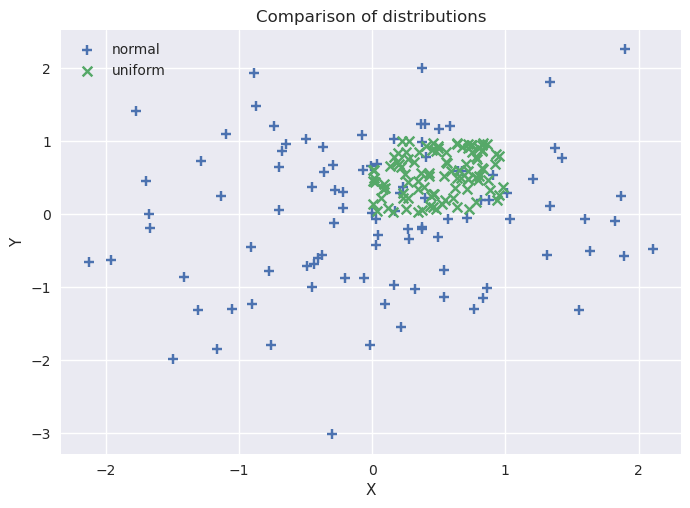

In [39]:
with plt.style.context('dark_background'):
    plt.scatter(xs, ys, marker='+')
    plt.scatter(xu, yu, marker='x')
    plt.legend(['normal', 'uniform'])
    
    plt.title('Comparison of distributions')
    plt.ylabel('Y')
    plt.xlabel('X')


## Making subplots
Matplotlib makes it possible to combine multiple plots into one figure. The function [`plt.subplots`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html) creates a figure with multiple sub-plots. The function returns a *figure* object and an array of *axes* objects. The *axes* objects are used to make plots in each subplot, add titles, and so forth. An example is shown in the cell below:


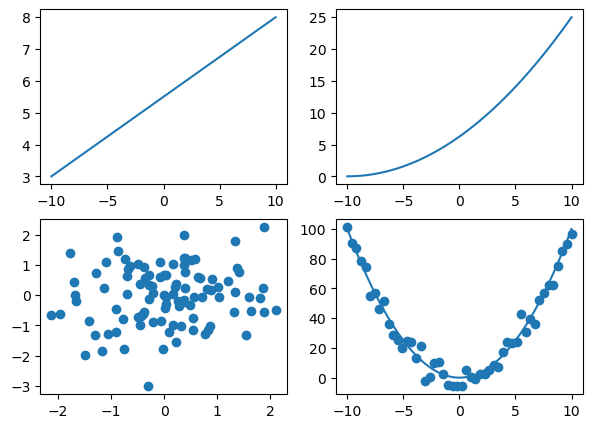

In [40]:
figure, axes = plt.subplots(2, 2, figsize=(7, 5))

axes[0, 0].plot(x_range, y_linear)
axes[0, 1].plot(x_range, y_quadratic)
axes[1, 0].scatter(xs, ys)
axes[1, 1].plot(x_range, y_values)
axes[1, 1].scatter(x_range, y_noise);


## Saving plots
To save a plot, use [`plt.savefig(output_path)`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html) to save the last plot created. An example is provided below:


In [41]:
plt.savefig('./outputs.pdf');


<Figure size 640x480 with 0 Axes>